<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH_307_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


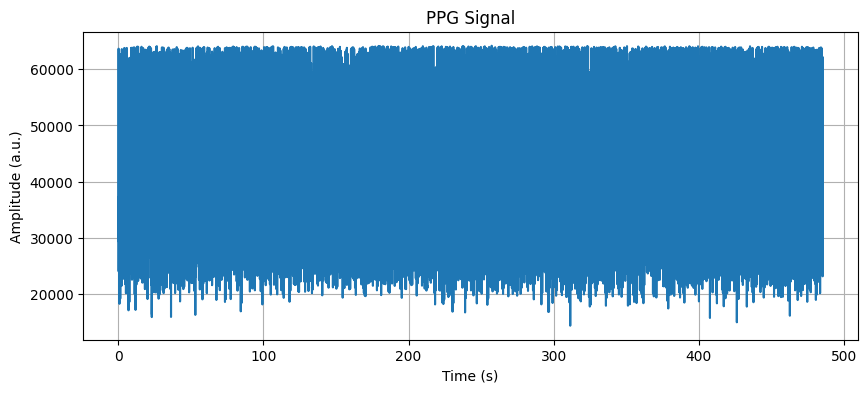

In [39]:
import wfdb
import requests
import matplotlib.pyplot as plt

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb (make sure the file name matches what was saved)
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = [i / record.fs for i in range(len(ppg_signal))]

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

# Plot the PPG signal
plt.figure(figsize=(10, 4))
plt.plot(time, ppg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal')
plt.grid()
plt.show()


In [40]:
pip install wfdb

In [51]:
import wfdb
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = np.arange(len(ppg_signal)) / record.fs  # Adjusted to ensure correct time array

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

import numpy as np
from scipy.signal import butter, filtfilt

# Low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
low_cutoff_frequency = 3  # Cut-off frequency for low-pass filter in Hz

fs = record.fs  # Sampling frequency from the .hea file

# Apply the low-pass and high-pass filters
filtered_ppg_signal_lowpass = lowpass_filter(ppg_signal, low_cutoff_frequency, fs)



PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


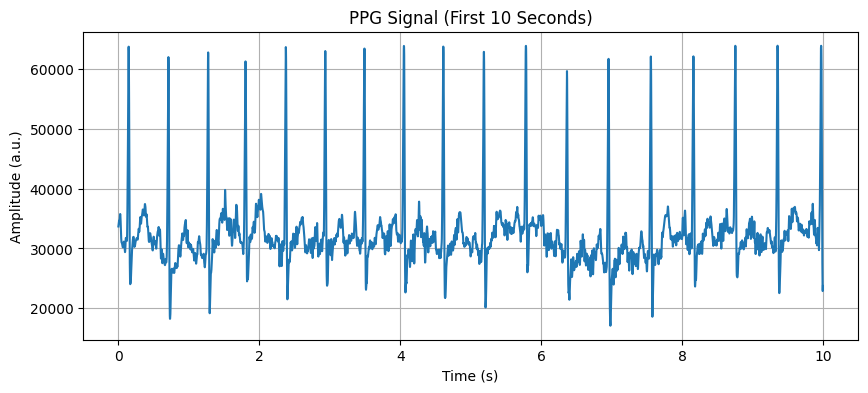

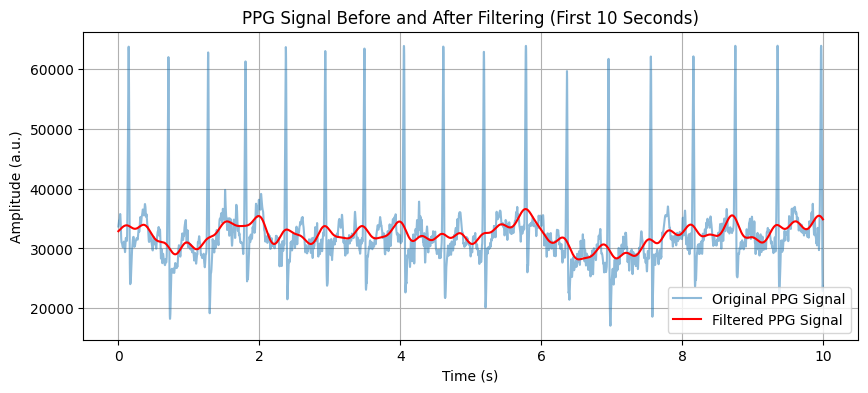

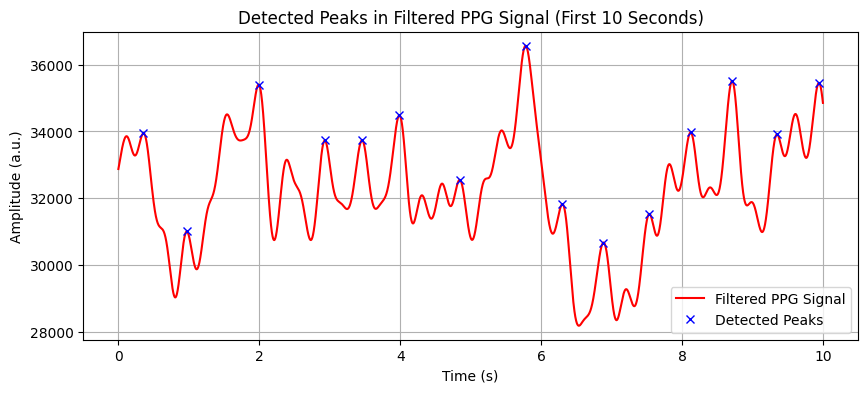

In [52]:
# Define time limit (10 seconds)
time_limit = 10  # seconds

# Find the corresponding index for the time limit
max_index = int(fs * time_limit)

# Slice the time and signal arrays to 10 seconds
time_10s = time[:max_index]
ppg_signal_10s = ppg_signal[:max_index]
filtered_ppg_signal_10s = filtered_ppg_signal_lowpass[:max_index]

# Plot the original PPG signal (limited to 10 seconds)
plt.figure(figsize=(10, 4))
plt.plot(time_10s, ppg_signal_10s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal (First 10 Seconds)')
plt.grid()
plt.show()

# Plot the original and filtered signals (limited to 10 seconds)
plt.figure(figsize=(10, 4))
plt.plot(time_10s, ppg_signal_10s, label='Original PPG Signal', alpha=0.5)
plt.plot(time_10s, filtered_ppg_signal_10s, label='Filtered PPG Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal Before and After Filtering (First 10 Seconds)')
plt.legend()
plt.grid()
plt.show()

# Peak detection (limited to 10 seconds)
peaks_10s = peaks[peaks < max_index]

# Plot the filtered signal with detected peaks (limited to 10 seconds)
plt.figure(figsize=(10, 4))
plt.plot(time_10s, filtered_ppg_signal_10s, label='Filtered PPG Signal', color='red')
plt.plot(time_10s[peaks_10s], filtered_ppg_signal_10s[peaks_10s], "x", label='Detected Peaks', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Detected Peaks in Filtered PPG Signal (First 10 Seconds)')
plt.legend()
plt.grid()
plt.show()


Interbeat Intervals (seconds): [0.614 1.02  0.94  0.528 0.53  0.856 0.934 0.522 0.584 0.65  0.586 0.588
 0.638 0.596]


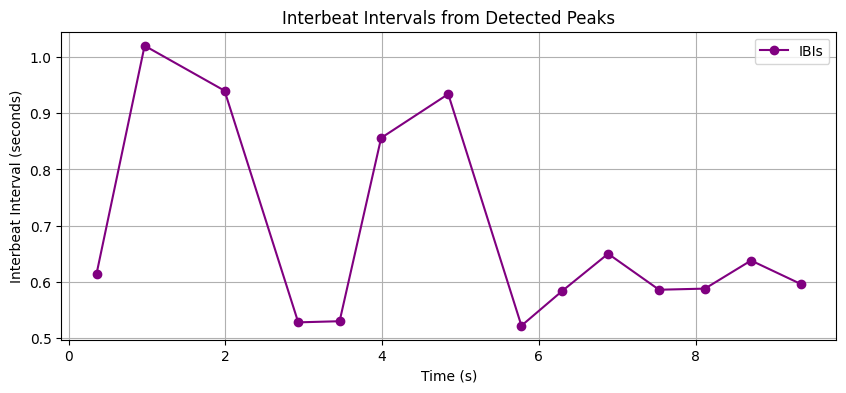

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'peaks_10s' contains the indices of detected peaks
# and 'time_10s' contains the time values for the PPG signal.

# Extract the times of the detected peaks
peak_times = time_10s[peaks_10s]

# Calculate the interbeat intervals (IBIs)
IBIs = np.diff(peak_times)  # Calculate differences between successive peak times

# Display the IBIs in seconds
print("Interbeat Intervals (seconds):", IBIs)

# Optional: Plot IBIs for better visualization
plt.figure(figsize=(10, 4))
plt.plot(peak_times[:-1], IBIs, marker='o', linestyle='-', color='purple', label='IBIs')
plt.xlabel('Time (s)')
plt.ylabel('Interbeat Interval (seconds)')
plt.title('Interbeat Intervals from Detected Peaks')
plt.legend()
plt.grid()
plt.show()


Interbeat Intervals (seconds): [0.614 1.02  0.94  0.528 0.53  0.856 0.934 0.522 0.584 0.65  0.586 0.588
 0.638 0.596]
Heart Rates (BPM): [ 97.71986971  58.82352941  63.82978723 113.63636364 113.20754717
  70.09345794  64.23982869 114.94252874 102.73972603  92.30769231
 102.3890785  102.04081633  94.04388715 100.67114094]


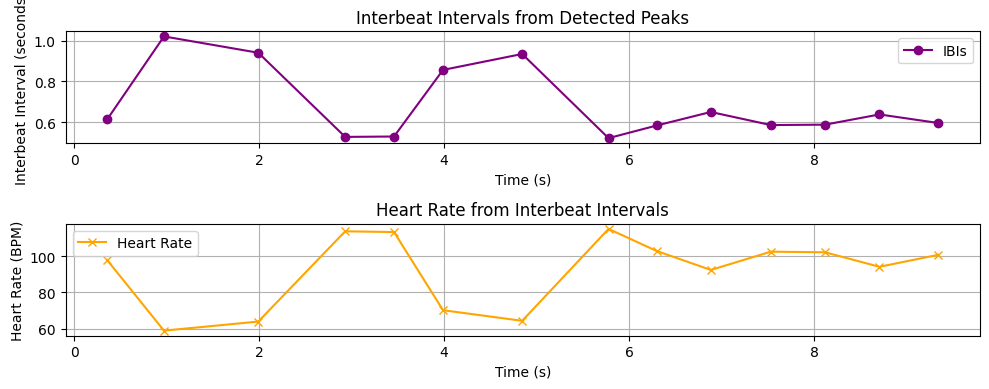

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'peaks_10s' contains the indices of detected peaks
# and 'time_10s' contains the time values for the PPG signal.

# Extract the times of the detected peaks
peak_times = time_10s[peaks_10s]

# Calculate the interbeat intervals (IBIs)
IBIs = np.diff(peak_times)  # Calculate differences between successive peak times

# Display the IBIs in seconds
print("Interbeat Intervals (seconds):", IBIs)

# Calculate heart rates from IBIs
# Heart rate (HR) = 60 / IBI (convert from seconds to beats per minute)
HRs = 60 / IBIs

# Display the heart rates in BPM
print("Heart Rates (BPM):", HRs)

# Optional: Plot IBIs and Heart Rates for better visualization
plt.figure(figsize=(10, 4))

# Plot IBIs
plt.subplot(2, 1, 1)
plt.plot(peak_times[:-1], IBIs, marker='o', linestyle='-', color='purple', label='IBIs')
plt.xlabel('Time (s)')
plt.ylabel('Interbeat Interval (seconds)')
plt.title('Interbeat Intervals from Detected Peaks')
plt.legend()
plt.grid()

# Plot Heart Rates
plt.subplot(2, 1, 2)
plt.plot(peak_times[:-1], HRs, marker='x', linestyle='-', color='orange', label='Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate from Interbeat Intervals')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
